In [39]:
import numpy as np
import pickle

In [4]:
def load_obj(name):
    with open(name+'.pkl', 'rb') as f:
        return pickle.load(f, encoding='latin1')

In [5]:
data=load_obj('/global/cscratch1/sd/abbatej/data_cer/final_data')

In [7]:
shots=list(data.keys())

In [23]:
data[shot].keys()

dict_keys(['pprime_EFITRT1', 'gasB', 'curr', 'dens', 'pinj_30L', 'pinj_30R', 'cer_temp_EFIT01', 'cer_rotation_EFIT02', 'cer_rotation_EFIT01', 'press_EFIT01', 'pinj', 'press_EFIT02', 'included_cer_channels', 'curr_target', 'pinj_33L', 'pinj_21L', 'gasA', 'pinj_15L', 'ffprime_EFIT01', 'ffprime_EFIT02', 'cer_rotation_EFITRT2', 'ech', 'thomson_dens_EFIT02', 'thomson_dens_EFIT01', 'pinj_33R', 'pinj_15R', 'pprime_EFITRT2', 'rotation', 'cer_rotation_EFITRT1', 'pinj_21R', 'thomson_dens_EFITRT2', 'thomson_dens_EFITRT1', 'idens', 'temp', 'cer_temp_EFIT02', 'thomson_temp_EFIT01', 'gasC', 'thomson_temp_EFIT02', 'gasE', 'gasD', 'tinj', 'cer_temp_EFITRT2', 'ffprime_EFITRT2', 'ffprime_EFITRT1', 'cer_temp_EFITRT1', 'thomson_temp_EFITRT1', 'thomson_temp_EFITRT2', 'time', 'itemp', 'pprime_EFIT02', 'pprime_EFIT01'])

In [24]:
sig_counts={}
for shot in shots:
    for sig in data[shot].keys():
        if sig in sig_counts:
            sig_counts[sig]+=1
        else:
            sig_counts[sig]=0

In [27]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


In [28]:
%matplotlib inline

In [33]:
plt.rcParams['figure.figsize'] = [20, 15]
font={'size': 20, 'weight': 'heavy'}
plt.rc('font', **font)

In [44]:
print(np.array(y))

dict_values([11042, 11049, 11060, 10770, 10770, 10770, 8568, 11053, 11059, 10770, 10770, 10770, 11053, 8568, 10152, 8473, 10920, 10770, 10770, 10770, 10909, 11049, 11049, 8473, 11049, 11049, 10770, 10920, 11042, 10909, 11060, 8568, 11053, 10897, 10917, 9868, 9728, 9946, 8266, 8175, 8266, 8175, 3226, 2674, 3226, 3227, 2565, 3223, 2674, 2565, 3223, 4693, 16])


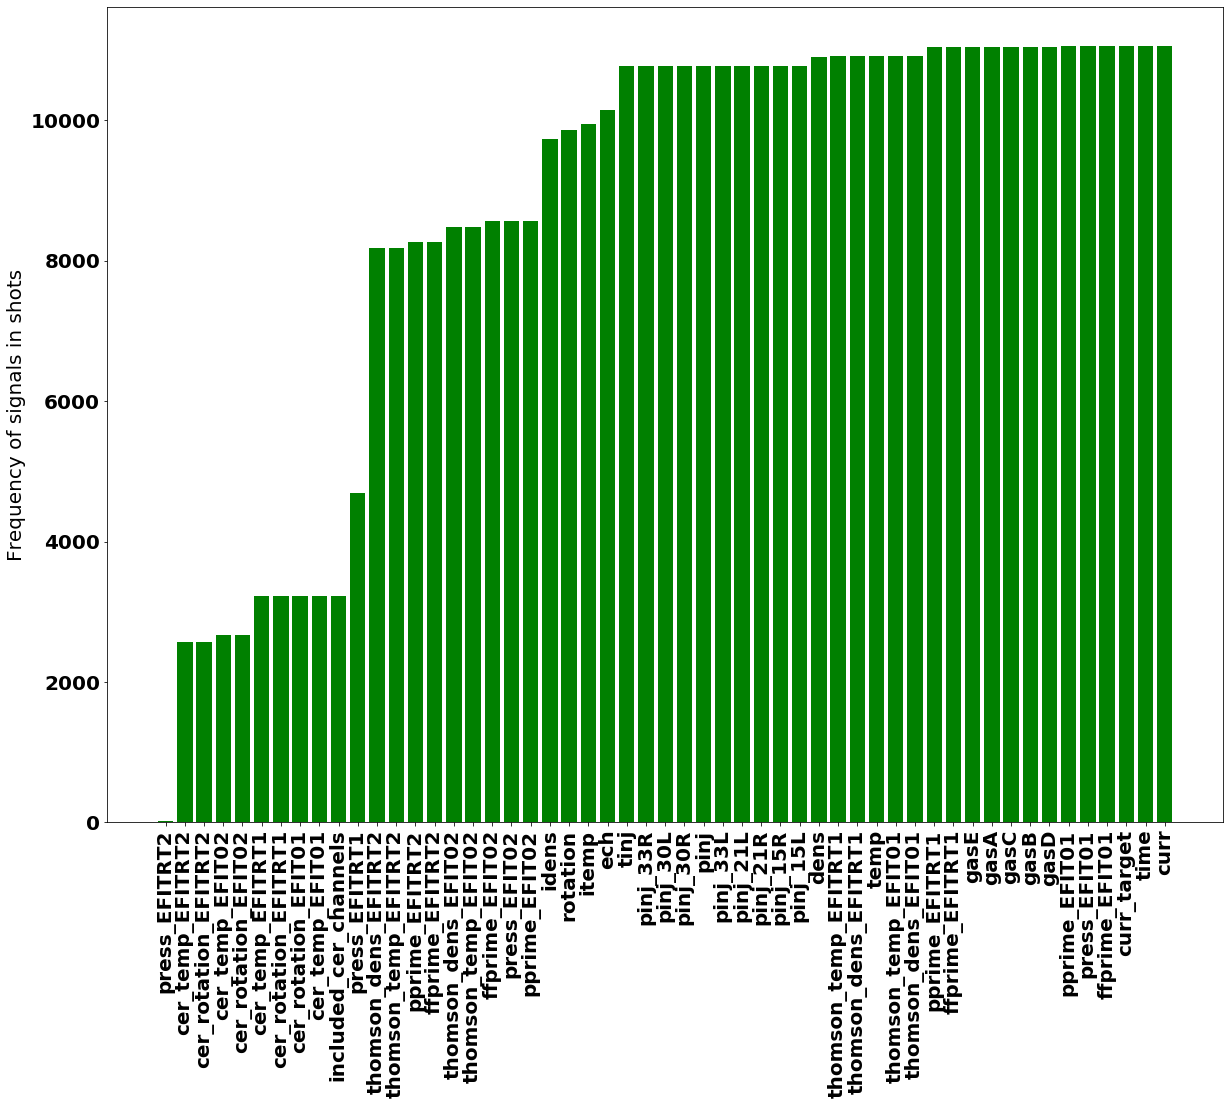

In [47]:
x=np.array(list(sig_counts.keys()))
y=np.array(list(sig_counts.values()))

x=x[np.argsort(y)]
y=np.sort(y)

plt.bar(x, y, color='g')
plt.xticks(rotation=90)
plt.ylabel('Frequency of signals in shots')
plt.show()

In [193]:
valid_shots=[]
sigs=['cer_temp_EFITRT1','itemp']
for shot in sorted(shots):
    if all([sig in data[shot].keys() for sig in sigs]):
        if len(data[shot]['included_cer_channels'])==16:
            valid_shots.append(shot)

In [194]:
print(valid_shots[:10])

[169597, 169598, 169599, 169600, 169601, 169602, 169604, 169605, 169606, 169607]


In [ ]:
valid_shots=[]
sigs=['cer_temp_EFITRT1','itemp']
for shot in sorted(shots):
    if all([sig in data[shot].keys() for sig in sigs]):
        if len(data[shot]['included_cer_channels'])>15:
            valid_shots.append(shot)

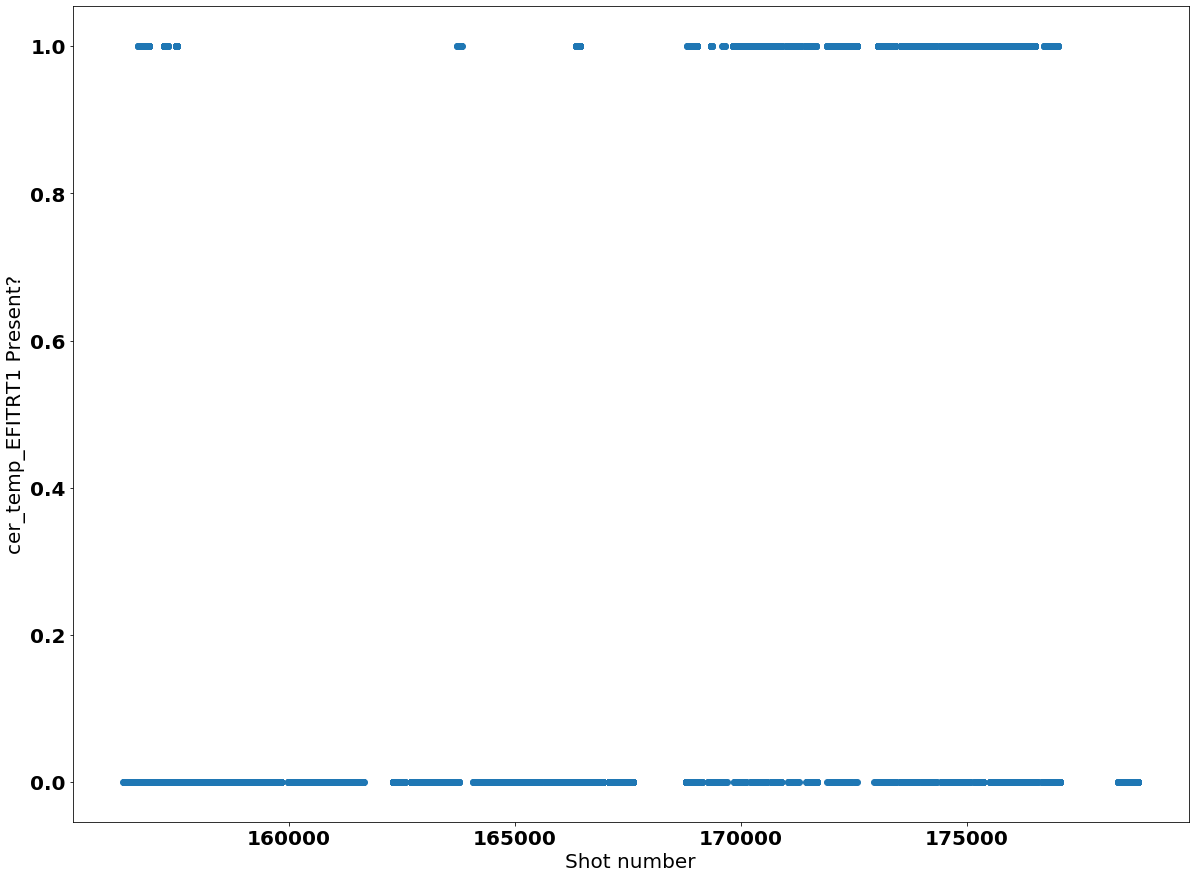

In [79]:
plt.scatter(sorted(shots),sig_present)
plt.xlabel('Shot number')
plt.ylabel('{} Present?'.format(sig))
plt.show()

Shot 172140
2450.0 ms


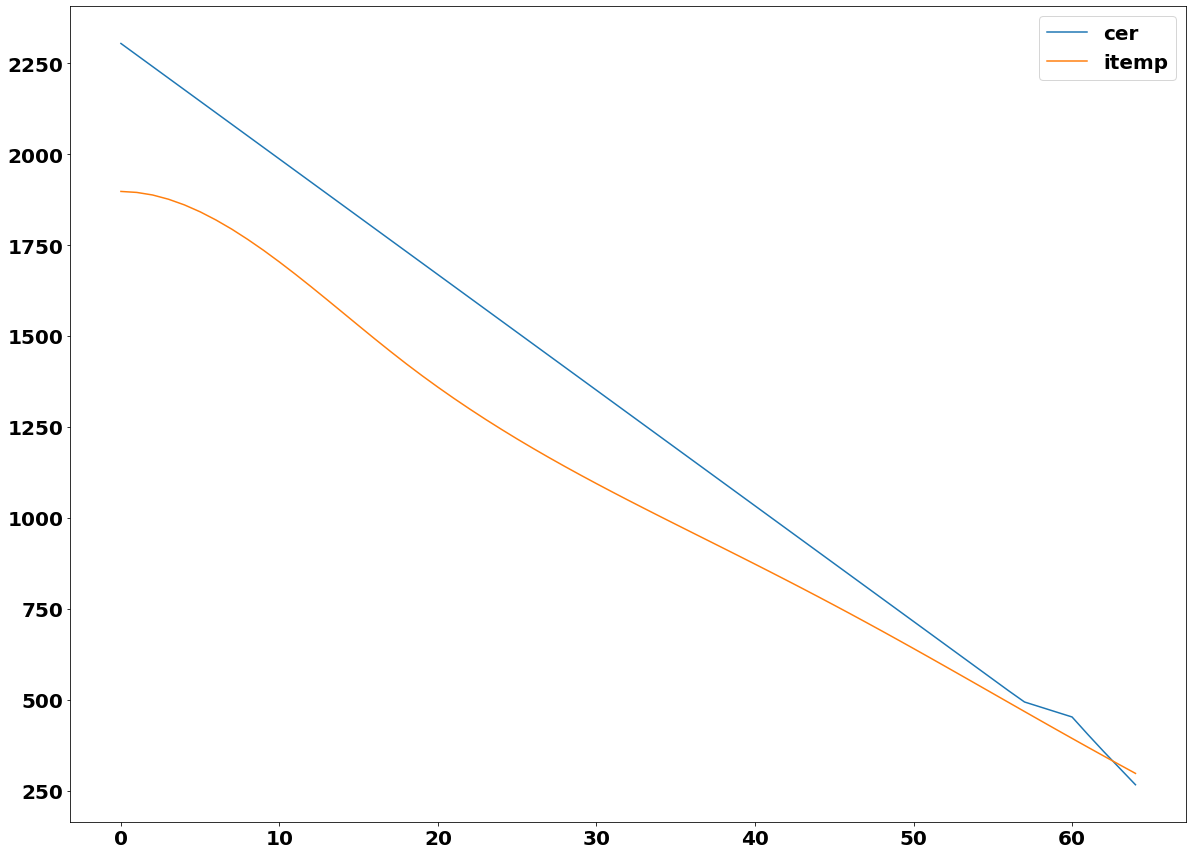

In [188]:
shot=np.random.choice(valid_shots)
print('Shot {}'.format(shot))
ind=np.random.randint(len(data[shot]['time']))
print('{} ms'.format(data[shot]['time'][ind]))
plt.plot(data[shot]['cer_temp_EFITRT1'][ind],label='cer')
plt.plot(data[shot]['itemp'][ind]*1000,label='itemp')
plt.legend()
plt.show()

In [171]:
channel_dict={}
sigs=['cer_temp_EFITRT1','itemp']
for shot in sorted(shots):
    if 'included_cer_channels' in data[shot].keys():
        this_length=len(data[shot]['included_cer_channels'])
        if this_length not in channel_dict:
            channel_dict[this_length]=0
        else:
            channel_dict[this_length]+=1

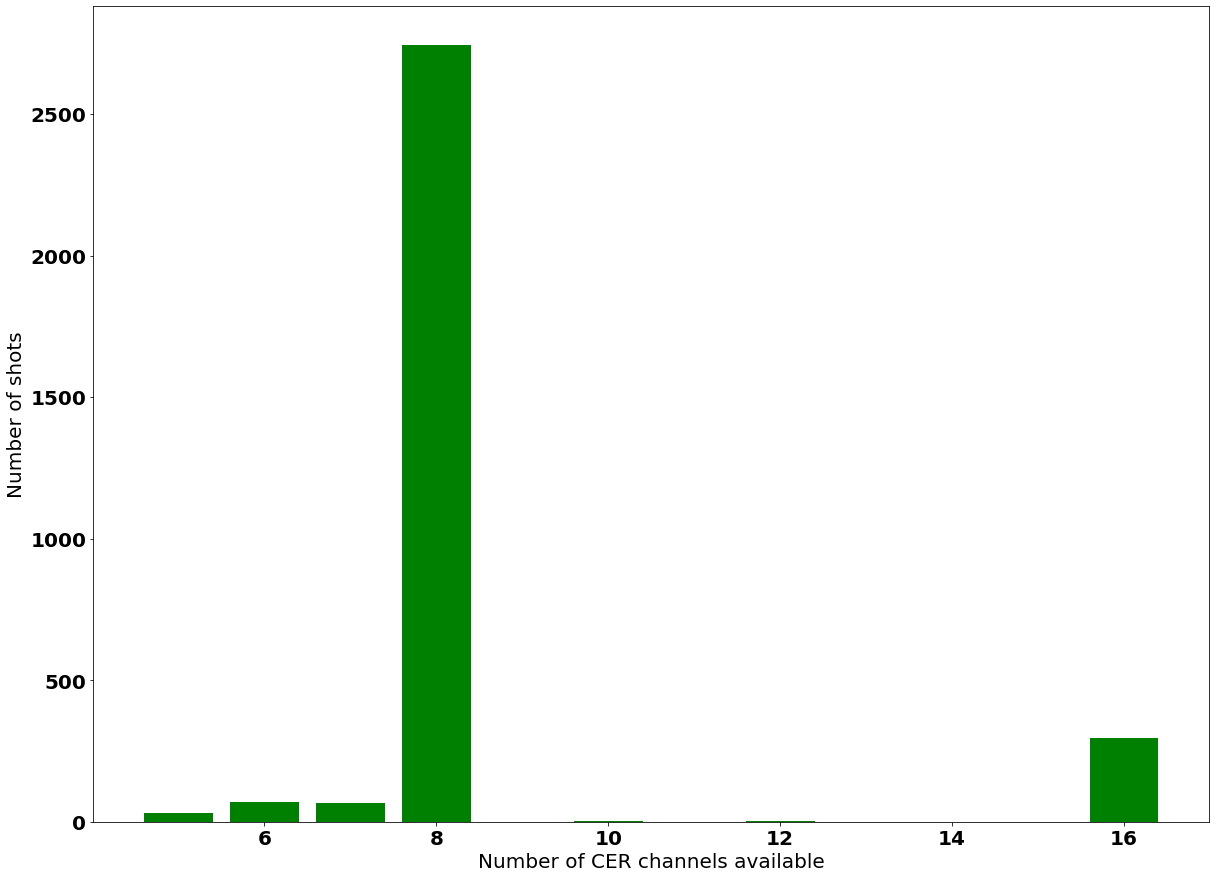

In [190]:
x=np.array(list(channel_dict.keys()))
y=np.array(list(channel_dict.values()))

x=x[np.argsort(y)]
y=np.sort(y)

plt.bar(x, y, color='g')
plt.xlabel('Number of CER channels available')
plt.ylabel('Number of shots')
plt.show()